TP 3 - Optimisation
=================================
**Author** : José Eduardo CARVALHO DE HOLANDA

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

## Programmation Dynamique

In [45]:
br17 = np.array([
   [9999,3,5,48,48,8,8,5,5,3,3,0,3,5,8,8,5],
   [3,9999,3,48,48,8,8,5,5,0,0,3,0,3,8,8,5],
   [5,3,9999,72,72,48,48,24,24,3,3,5,3,0,48,48,24],
   [48,48,74,9999,0,6,6,12,12,48,48,48,48,74,6,6,12],
   [48,48,74,0,9999,6,6,12,12,48,48,48,48,74,6,6,12],
   [8,8,50,6,6,9999,0,8,8,8,8,8,8,50,0,0,8],
   [8,8,50,6,6,0,9999,8,8,8,8,8,8,50,0,0,8],
   [5,5,26,12,12,8,8,9999,0,5,5,5,5,26,8,8,0],
   [5,5,26,12,12,8,8,0,9999,5,5,5,5,26,8,8,0],
   [3,0,3,48,48,8,8,5,5,9999,0,3,0,3,8,8,5],
   [3,0,3,48,48,8,8,5,5,0,9999,3,0,3,8,8,5],
   [0,3,5,48,48,8,8,5,5,3,3,9999,3,5,8,8,5],
   [3,0,3,48,48,8,8,5,5,0,0,3,9999,3,8,8,5],
   [5,3,0,72,72,48,48,24,24,3,3,5,3,9999,48,48,24],
   [8,8,50,6,6,0,0,8,8,8,8,8,8,50,9999,0,8],
   [8,8,50,6,6,0,0,8,8,8,8,8,8,50,0,9999,8],
   [5,5,26,12,12,8,8,0,0,5,5,5,5,26,8,8,9999]
   ])


### Résolution par programmation dynamique : Version naïve

In [46]:
# Prémier version :
def D(i,E):
    if not E:
        return br17[i][0]
    else:
        pos = []
        
        for j in E:
            if i != j: ## D(i,E) = min(br17[i][j] + D(j,E\{j}))
                copy = E.copy()
                copy.remove(j)
                pos.append(br17[i][j] + D(j, copy))
        return min (pos)

In [47]:
%%time
i = 0
E = [j for j in range(11)]
E.remove(i)
D(i, E) # D(0, E\{0})

CPU times: total: 4.89 s
Wall time: 4.9 s


39

In [48]:
def n(E):
    sum = 0
    for i in E:
        sum += 1*2**i
    return sum

n(E)

2046

In [49]:
## Nouvelle fonction qu'on peut mésurer les iteractions.

# Deuxième version :

def D(i,E):
    global k
    k += 1
    
    if not E:
        return br17[i][0]
    else:
        pos = []
        
        for j in E:
            if i != j:
                copy = E.copy()
                copy.remove(j)
                pos.append(br17[i][j] + D(j, copy))
        return min (pos)

In [50]:
k_list = {}
k = 0
for n in range(1, 11):
    E = [j for j in range(1,n)]
    k = 0
    D(i, E)
    k_list[n] = k


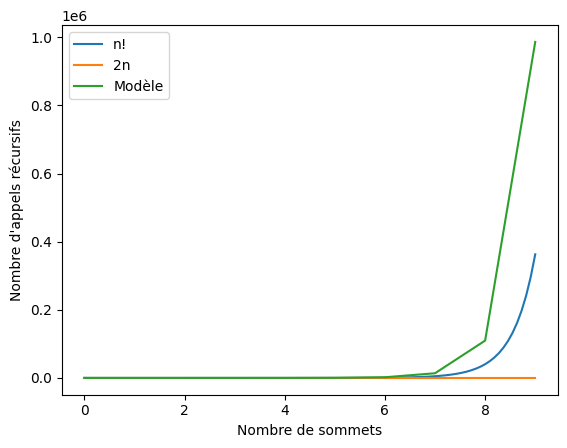

In [51]:
x = np.linspace(0, 9, 100)

plt.plot(x, factorial(x), label='n!')
plt.plot(x, 2*x, label='2n')
plt.plot(k_list.values(), label='Modèle')
plt.xlabel('Nombre de sommets')
plt.ylabel("Nombre d'appels récursifs")

plt.legend()
plt.show()

Le graphique ci-dessus montre que la fonction D(i,E) ne suit pas la forme des fonctions polynomiales, ni de la fonction factorielle (en effet, ils ne sont pas proches entre eux). Par conséquent, D(i,E) est non polynomiale.


In [52]:
## Version qui utilise le memD[i][E]. Si memD[i][E] déjà existe, il faut qu'on fasse le fonction retourner cette valeur.
## Sinon, la fonction calcule la valeur D(i,E) et le mémorise dans memD[i][E].
# Troixième version :
memD = {}

def D(i, E):
    global k
    k += 1
    if not E:
        return br17[i][0]
    
    sommets = tuple(sorted(E)) #mettre à ordre les sommets
    
    if (i, sommets) in memD:
        return memD[(i, sommets)] # si déjà existe, retorne le valeur
    else:
        pos = []
    for j in E:
        if i != j:
            copy = E.copy()
            copy.remove(j)
            pos.append(br17[i][j] + D(j, copy))
    result = min (pos)
    memD[(i, sommets)] = result
    
    return result

In [53]:
%%time
n = 17
i = 0
E = [j for j in range(n)]
E.remove(i)
D(i, E)

CPU times: total: 4.45 s
Wall time: 4.47 s


39

Avec $n = 17$, l'algorithme a été capable de bien calculé. En effet, la fonction est appellé moins souvent, alors c'est très vite à calculer.

In [54]:
k_list = {}
k = 0
for n in range(1, 11):
    E = [j for j in range(1,n)]
    k = 0
    D(i, E)
    k_list[n] = k

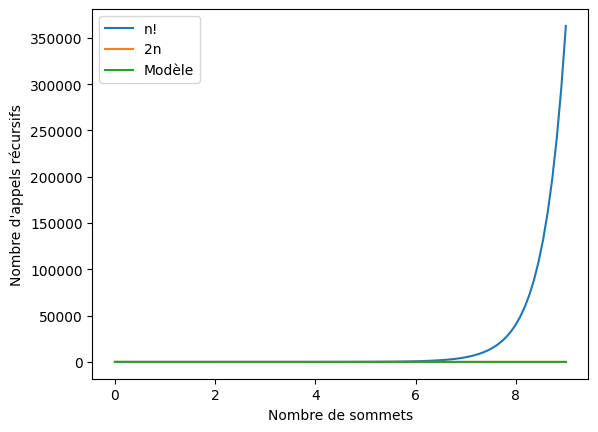

In [55]:
x = np.linspace(0, 9, 100)

plt.plot(x, factorial(x), label='n!')
plt.plot(x, 2*x, label='2n')
plt.plot(k_list.values(), label='Modèle')
plt.xlabel('Nombre de sommets')
plt.ylabel("Nombre d'appels récursifs")

plt.legend()
plt.show()

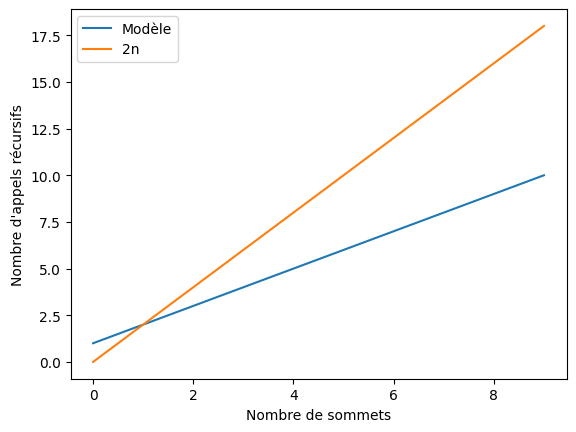

In [56]:
x = np.linspace(0, 9, 100)

plt.plot(k_list.values(), label='Modèle')
plt.plot(x, 2*x, label='2n')
plt.xlabel('Nombre de sommets')
plt.ylabel("Nombre d'appels récursifs")

plt.legend()
plt.show()

D'après le graphique ci-dessus, nous pouvons conclure que, puisque la fonction est appelée moins de fois, elle est beaucoup plus proche d'une fonction $f(x) = 2x$ que de la fonction factorielle. 

Et, finalement, pour afficher le chemin :

In [57]:
memD = {}

index = {}

def D(i, E):
    global k
    k += 1
    if not E:
        index[((), i)] = 0 #chemin. Au début, cela est vide.
        
        return br17[i][0]


    sommets = tuple(sorted(E))
    
    if (i, sommets) in memD:
        return memD[(i, sommets)]
    else:
        pos = []
    for j in E:
        if i != j:
            copy = E.copy()
            copy.remove(j)
            pos.append(br17[i][j] + D(j, copy))
    result = min (pos)
    
    index[(sommets, i)] = E[pos.index(result)]
    memD[(i, sommets)] = result
    
    return result

In [58]:
i = 0
E = [j for j in range(17)]
E.remove(i)
D(i, E)

39

In [59]:
copy = E.copy()

chemin = [0]
while (index[(tuple(sorted(copy)), i)] != 0): # 
    next_node = index[(tuple(sorted(copy)), i)]
    copy.remove(next_node)
    i = next_node
    chemin.append(next_node)
    
chemin.append(0)

chemin

[0, 2, 13, 1, 9, 10, 12, 5, 6, 14, 15, 3, 4, 7, 8, 16, 11, 0]